In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load the dataset
file_path = r"C:\Users\jolin\Python 20240430\Team_project_1\team_project\data\processed\Life Expectancy Data.csv"
data = pd.read_csv(file_path)

#Display the first few rows of the dataset
print(data.head())

#Display summary statistics
print(data.describe())

       Country  Year  Status  Life expectancy  Adult Mortality  infant deaths  \
0  Afghanistan    15       1             65.0         0.791586       0.268824   
1  Afghanistan    14       1             59.9         0.856072       0.285786   
2  Afghanistan    13       1             59.9         0.831890       0.302749   
3  Afghanistan    12       1             59.5         0.864132       0.328193   
4  Afghanistan    11       1             59.2         0.888314       0.345155   

    Alcohol  percentage expenditure  Hepatitis B   Measles  ...     Polio  \
0 -1.172958               -0.335570    -0.705861 -0.110384  ... -3.278638   
1 -1.172958               -0.334441    -0.838704 -0.168124  ... -1.051482   
2 -1.172958               -0.334594    -0.750142 -0.173531  ... -0.880163   
3 -1.172958               -0.332096    -0.617299  0.032045  ... -0.666013   
4 -1.172958               -0.367862    -0.573018  0.051757  ... -0.623183   

   Total expenditure  Diphtheria  HIV/AIDS       G

In [54]:
# Categories

categories = {
    'Lifestyle': ['Alcohol', 'BMI'],
    'Infectious Diseases': ['Polio', 'Diphtheria', 'HIV/AIDS'],
    'Economic' : ['percentage expenditure', 'Total expenditure', 'GDP', 'Status'],
    'Household income' : ['Income composition of resources'],
    'Education': ['Schooling'],
    'Mortality': ['Adult Mortality'],
    'Thinness': ['thinness  1-19 years']
    }


In [55]:
# Create a common plotting

def plot_relationships(df, category_name, variables):
    plt.figure(figsize=(14,8))
    for variable in variables:
        if variable != 'Status':
            sns.scatterplot(x=variable, y='Life expectancy', data=df, label=variable)
    plt.title(f'{category_name}: the relationship between variables and Life expectancy')
    plt.xlabel('variable')
    plt.ylabel('Life expectancy')
    plt.legend()
    plt.show()
    

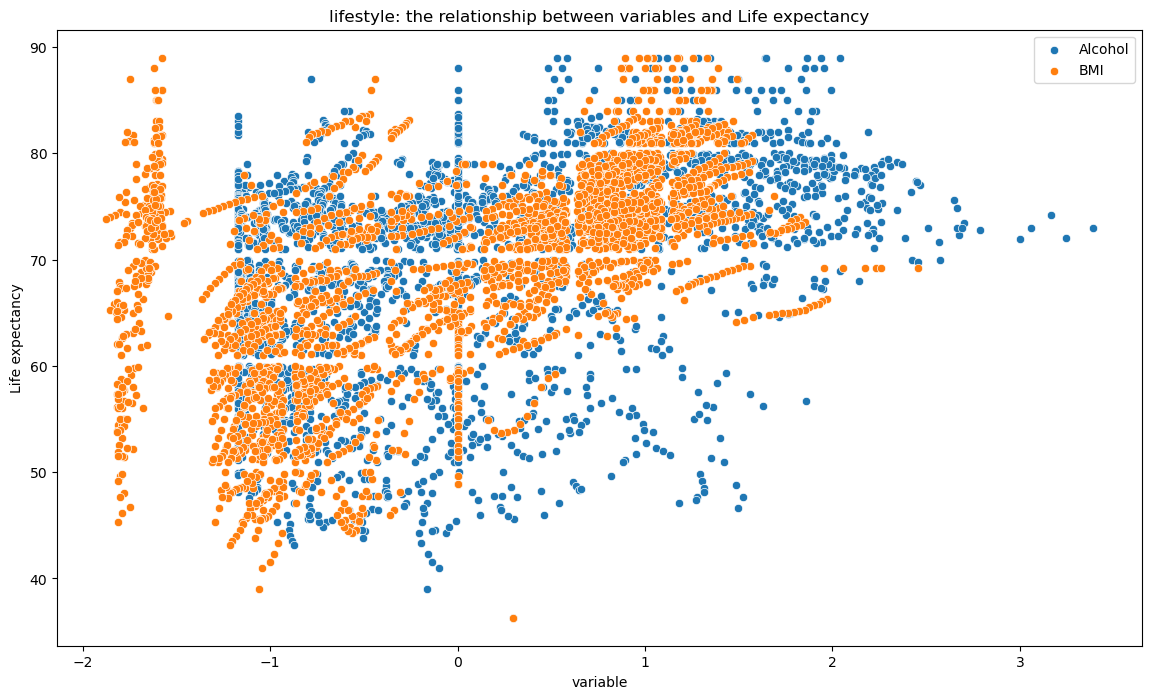

In [56]:
# Lifestyle 
plot_relationships(data,'lifestyle',categories['Lifestyle'])

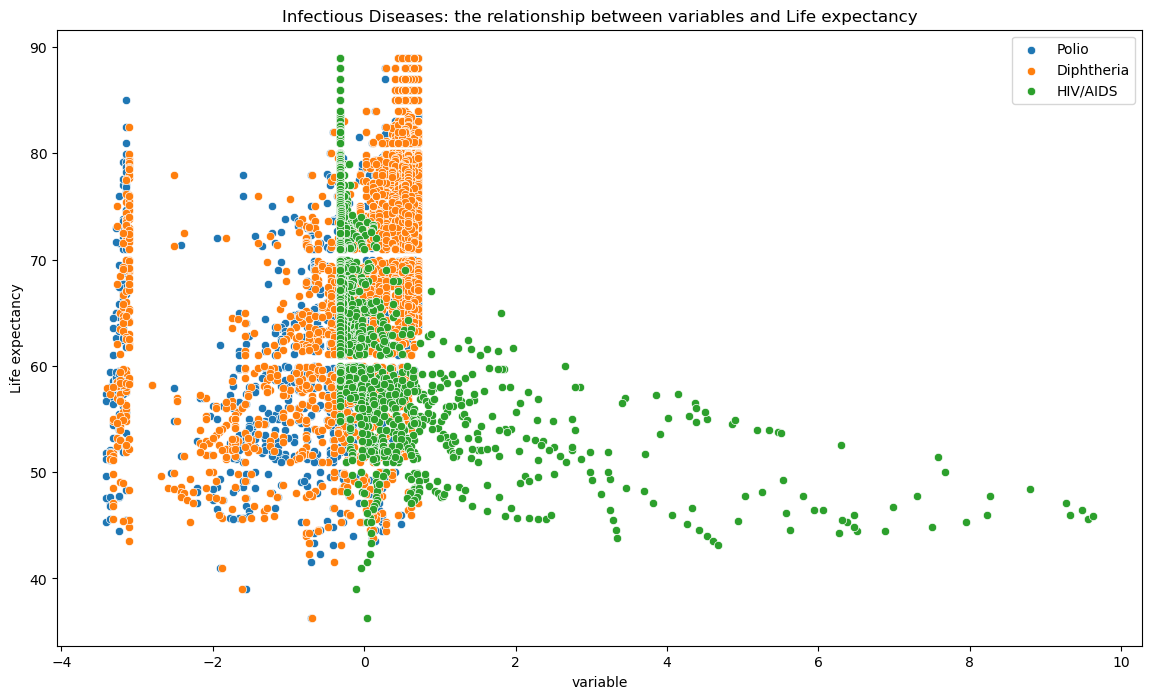

In [57]:
#Infectious Diseases
plot_relationships(data, 'Infectious Diseases', categories['Infectious Diseases'])

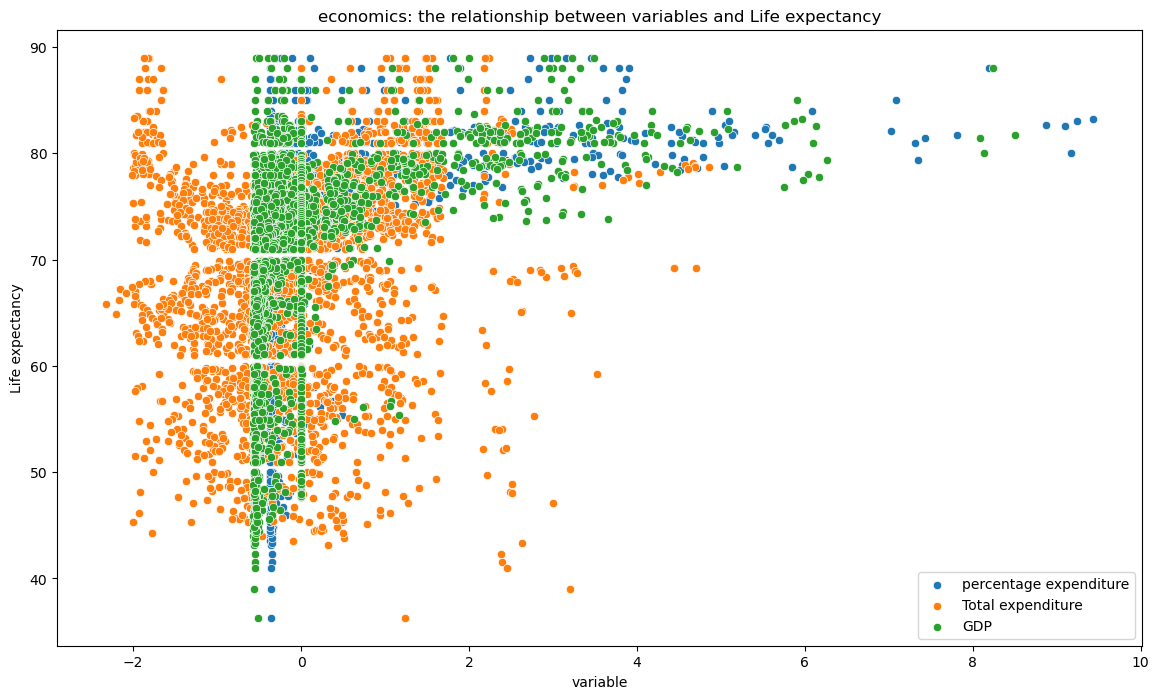

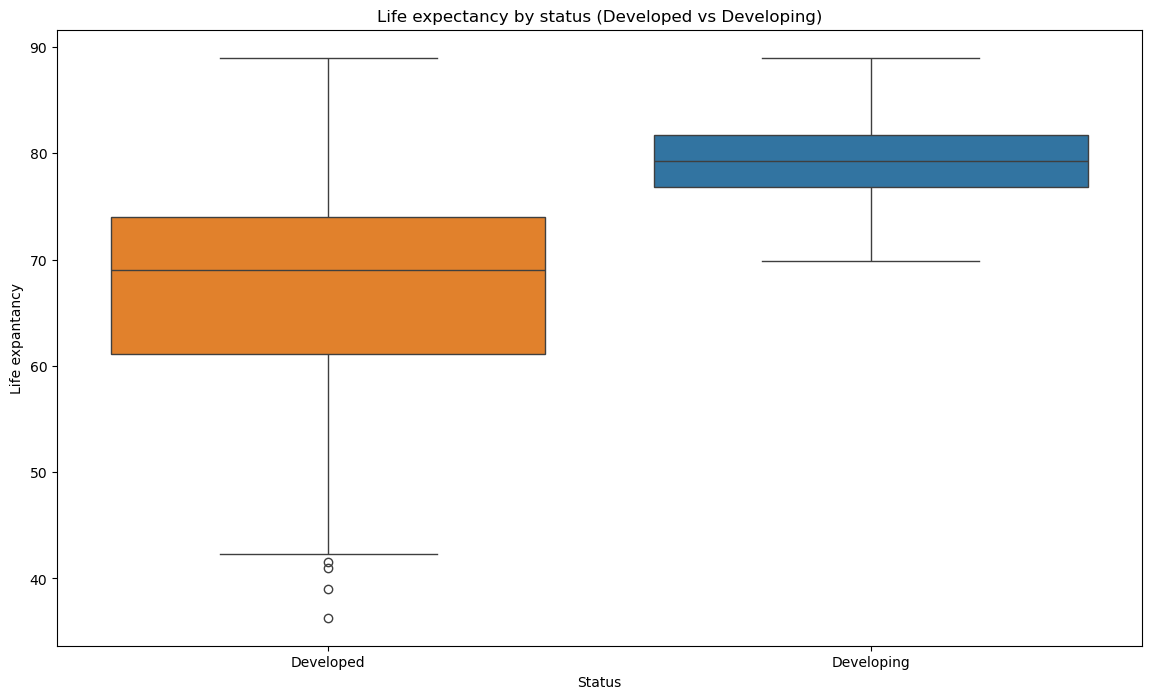

In [58]:
#Economic
plot_relationships(data,'economics', [var for var in categories['Economic'] if var !="Status"])

#Map numerical values to lables
data ['Status'] = data ['Status'].map({0: 'Developing',1: 'Developed'})

#plotting
plt.figure(figsize=(14,8))
sns.boxplot(x='Status',y='Life expectancy', data=data,hue = "Status", hue_order= ['Developing','Developed'])
plt.title('Life expectancy by status (Developed vs Developing)')
plt.xlabel('Status')
plt.ylabel('Life expantancy')
plt.show()

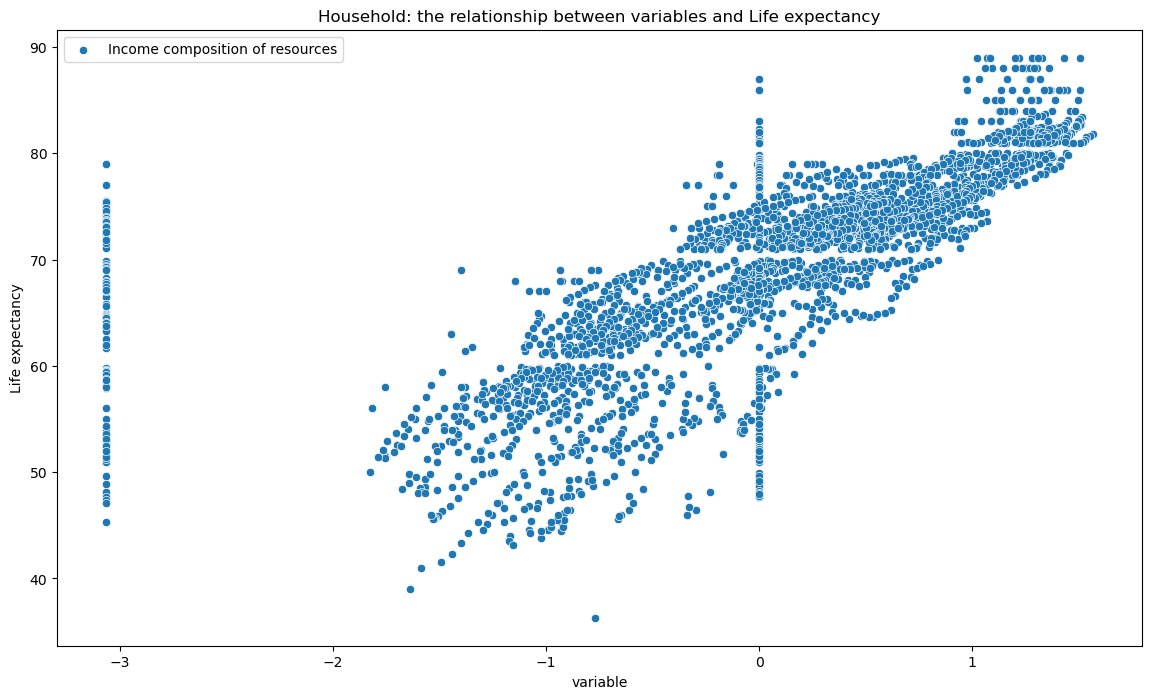

In [59]:
#Household income
plot_relationships(data,"Household",categories['Household income'])


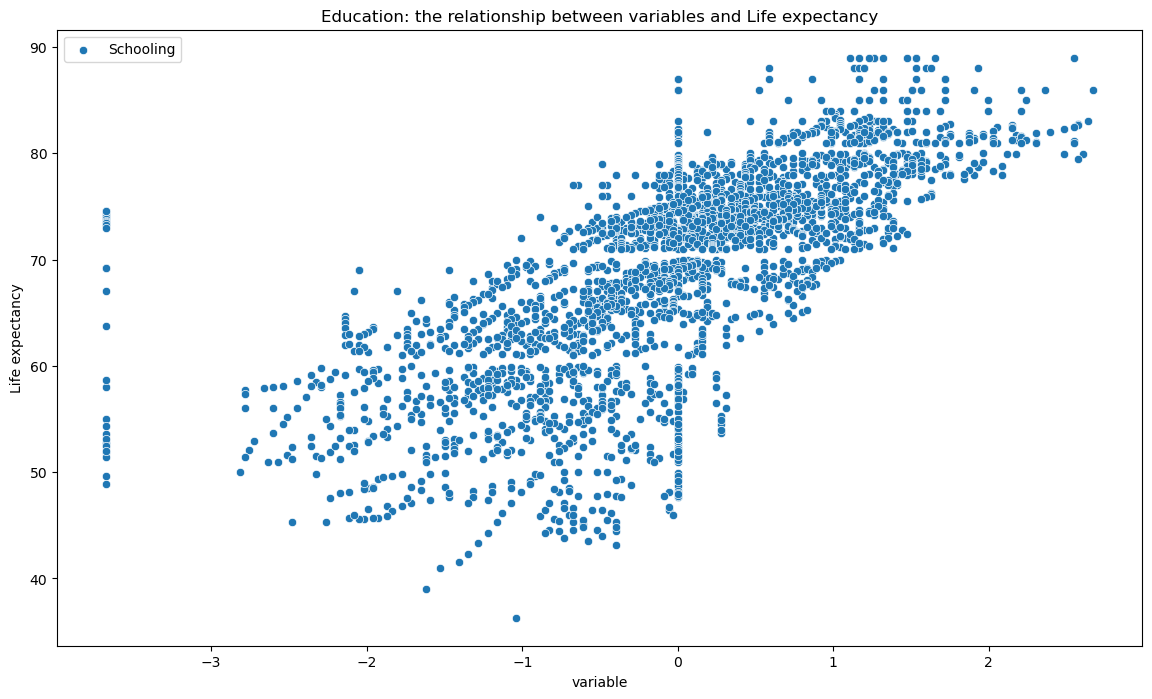

In [60]:
#Education
plot_relationships(data,'Education',categories['Education'])


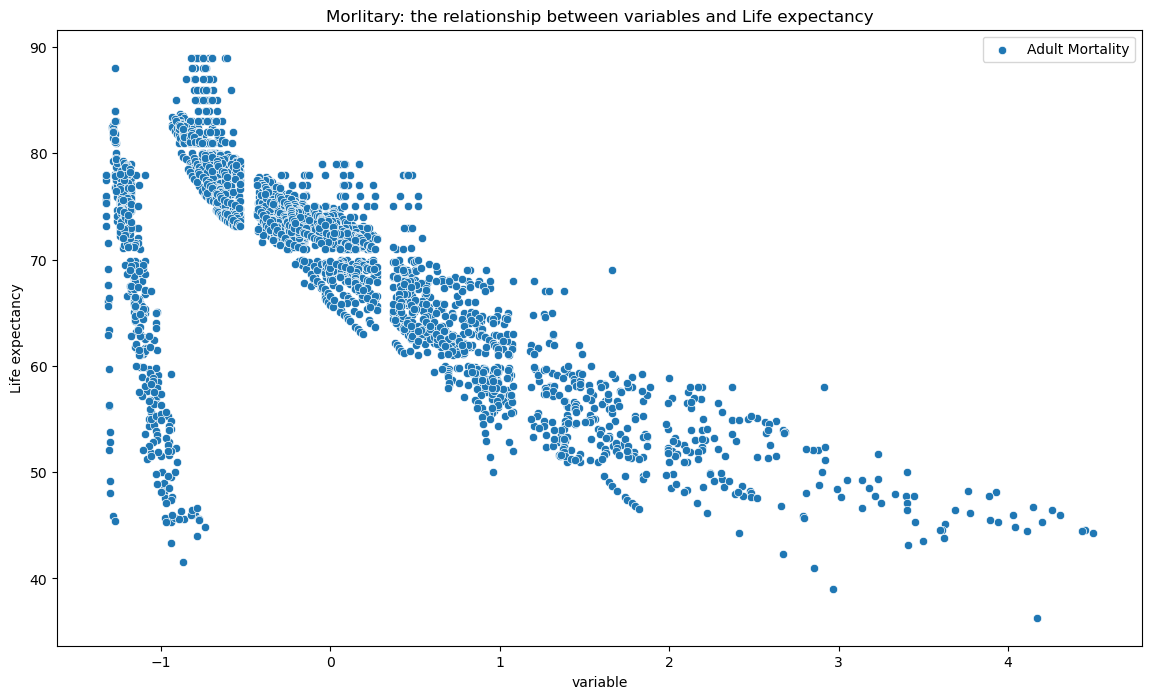

In [61]:
#Morlitary
plot_relationships(data,'Morlitary',categories['Mortality'])

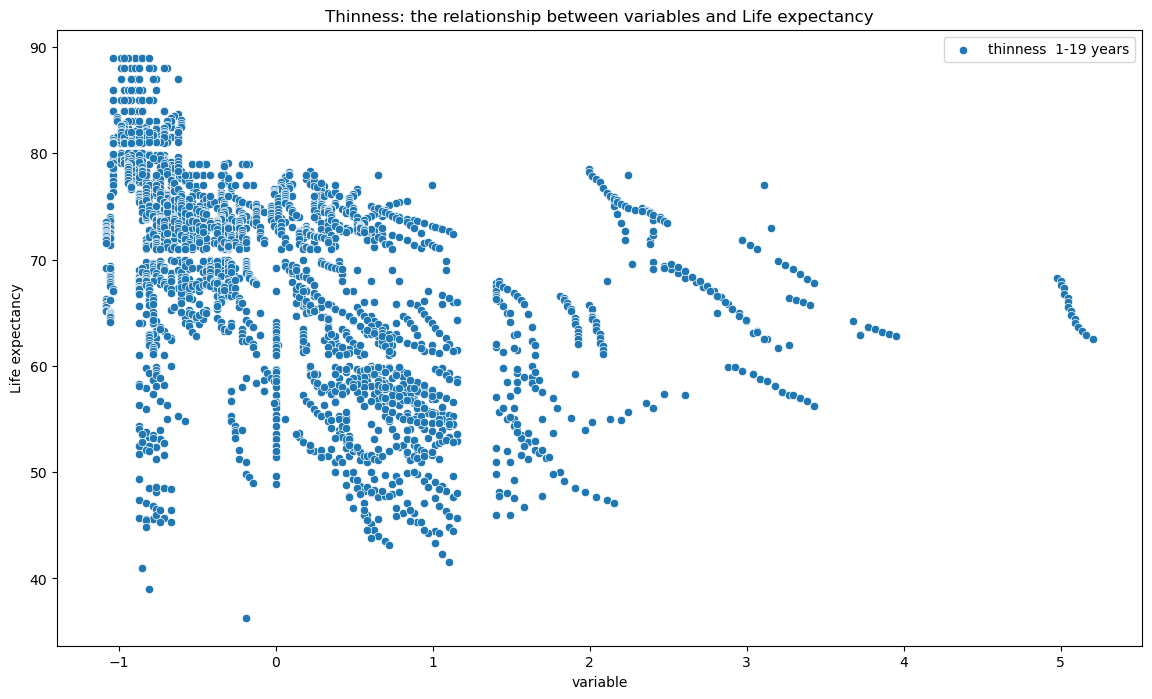

In [62]:
#Thinness
plot_relationships(data,'Thinness',categories['Thinness'])


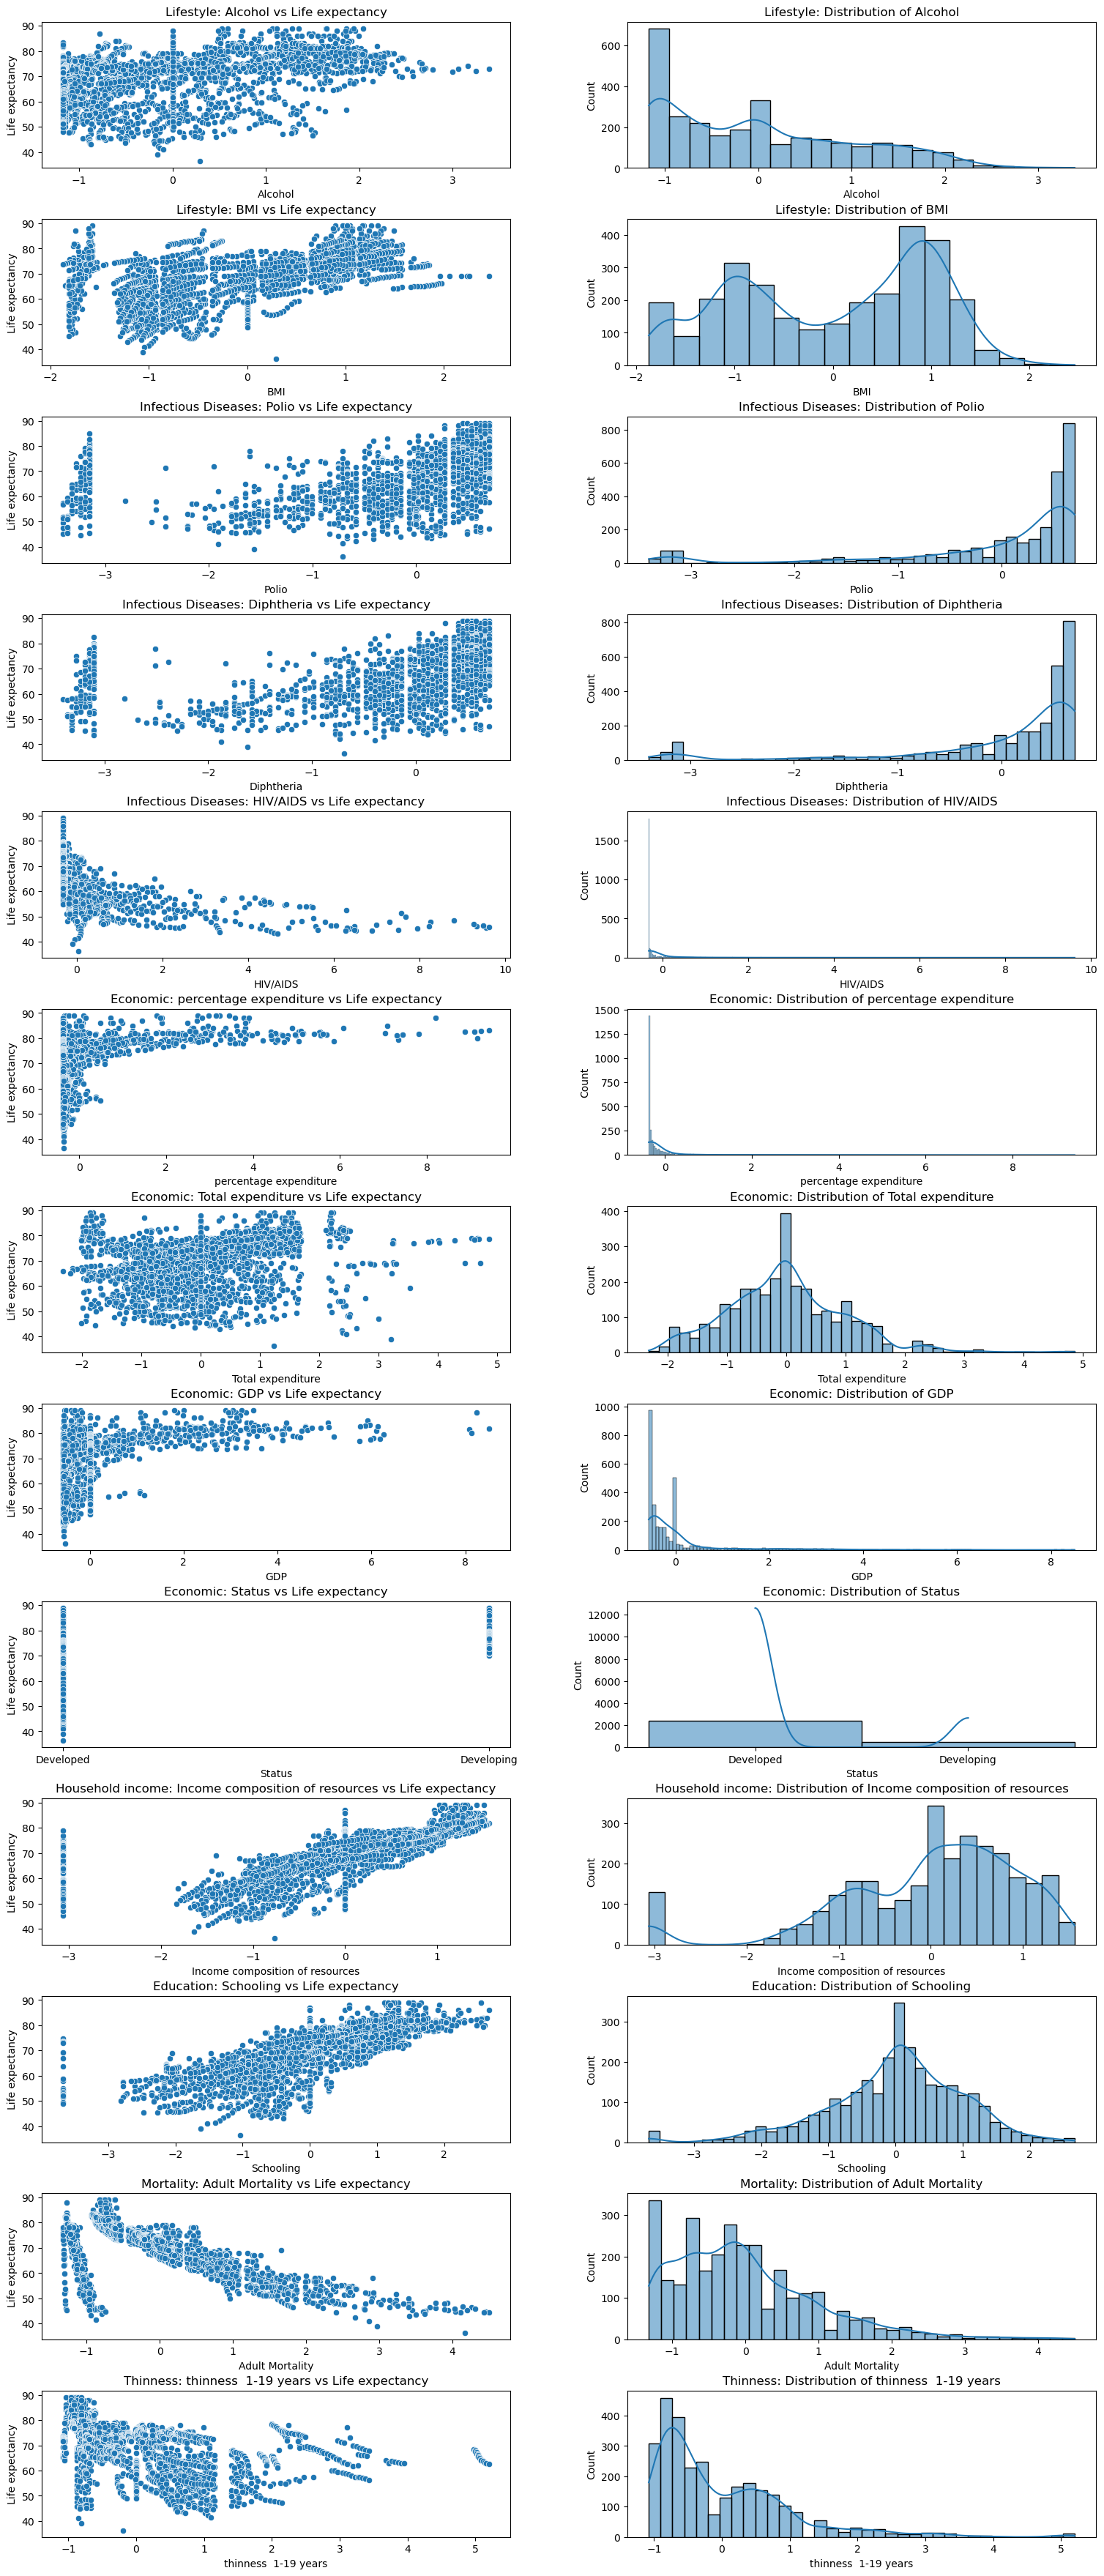

In [63]:
# Function to perform EDA and generate plots
def perform_eda(df):
    plt.figure(figsize=(18,15))
    total_plots = sum(len(vars) for vars in categories.values())

    #Iterate through categories and variables
    plot_index =1
    for category, variables in categories.items():
        for var in variables:
            plt.subplot(total_plots, 2, plot_index)
            sns.scatterplot(x=var, y='Life expectancy', data=df)
            plt.title(f'{category}: {var} vs Life expectancy')
            plot_index +=1

            plt.subplot(total_plots, 2, plot_index)
            sns.histplot(df[var].dropna(), kde=True)
            plt.title(f'{category}: Distribution of {var}')
            plot_index +=1

    plt.subplots_adjust(top=2.3, bottom=0.01, left=0.1, right=0.9, hspace=0.35, wspace = 0.25)
    plt.show()

# Perform EDA
perform_eda(data)          

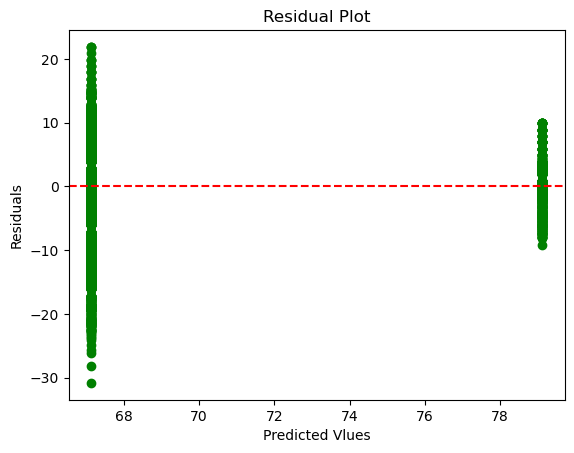

In [64]:
#Residual analysis
predicted_values = model.predict(X)
residuals = y - predicted_values

#Scatter plot of residuals against predicted values
plt.scatter(predicted_values, residuals, color = 'green')
plt.axhline(y=0, color='red',linestyle = '--')
plt.title('Residual Plot')
plt.xlabel('Predicted Vlues')
plt.ylabel('Residuals')
plt.show()